In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

##### 准备数据

In [3]:
import torchvision
from torchvision import datasets
from torchvision import transforms

In [4]:
transformation = transforms.Compose([
    transforms.ToTensor()
])

In [5]:
train_ds = datasets.FashionMNIST(
                                  "data/",
                                  train     = True,
                                  transform = transformation,
                                  download  = True
                                )
test_ds  = datasets.FashionMNIST(
                                  "data/",
                                  train     = False,
                                  transform = transformation,
                                  download  = True
                                )

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST\raw\train-images-idx3-ubyte.gz to data/FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST\raw\train-labels-idx1-ubyte.gz to data/FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data/FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data/FashionMNIST\raw



In [6]:
# 创建DataLoader
train_dl = torch.utils.data.DataLoader(train_ds,batch_size=64,shuffle=True)
test_dl  = torch.utils.data.DataLoader(test_ds,batch_size=256,shuffle=False)

In [7]:
# 查看数据
imgs,label = next(iter(train_dl))

In [8]:
imgs.shape

torch.Size([64, 1, 28, 28])

tensor(5)


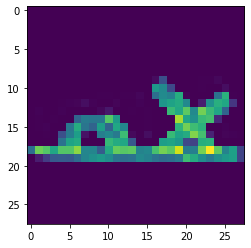

In [9]:
img = imgs[0]
img = img.numpy()
img = np.squeeze(img)
plt.imshow(img)
print(label[0])

In [10]:
# 自定义绘图函数
def imshow(img):
    npimg = img.numpy()
    npimg = np.squeeze(npimg)
    plt.imshow(npimg)

tensor(5)
tensor(1)
tensor(2)
tensor(8)
tensor(2)
tensor(8)
tensor(5)
tensor(4)
tensor(4)
tensor(2)


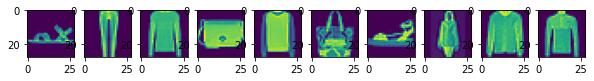

In [11]:
# 测试自定义绘图函数
plt.figure(figsize=(10,1))
for i ,img in enumerate(imgs[:10]):
    plt.subplot(1,10,i+1)
    #print(i,img)
    imshow(img)
    print(label[i])

#### 创建模型

In [12]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_1 = nn.Linear(28*28,1200)
        self.linear_2 = nn.Linear(1200,84)
        self.linear_3 = nn.Linear(84,10)
    
    def forward(self,input):
        x = input.view(-1,28*28)
        x = self.linear_1(x)
        x = F.relu(x)
        x = self.linear_2(x)
        x = F.relu(x)
        x = self.linear_3(x)
        return x

In [13]:
def fit(model,trainloader,testloader,epoch):
    correct = 0       # 记录正确率
    total   = 0       # 记录训练样本总数量
    running_loss = 0
    
    for x,y in trainloader:
        x,y    = x.to(device),y.to(device)
        y_pred = model(x)
        loss   = loss_fn(y_pred,y)
        optim.zero_grad()
        loss.backward()
        optim.step()
        with torch.no_grad():
            y_pred = torch.argmax(y_pred,dim=1)
            correct+=(y_pred == y).sum().item()
            total  += y.size(0)
            running_loss += loss.item()
    
    epoch_loss = running_loss / len(trainloader.dataset) # 得到每一个样本在本epoch下的平均loss
    epoch_acc  = correct / total # 得到整个样本的平均预测正确率
    
    test_correct      = 0       # 记录正确率
    test_total        = 0       # 记录训练样本总数量
    test_running_loss = 0

    with torch.no_grad():
        for x,y in trainloader:
            x,y    = x.to(device),y.to(device)
            y_pred = model(x)
            loss   = loss_fn(y_pred,y)
            y_pred = torch.argmax(y_pred,dim=1)
            test_correct+=(y_pred == y).sum().item()
            test_total  += y.size(0)
            test_running_loss += loss.item()
    
    epoch_test_loss = test_running_loss / len(testloader.dataset) # 得到每一个样本在本epoch下的平均loss
    epoch_test_acc  = test_correct / test_total # 得到整个样本的平均预测正确率
    
    print(
            "epoch:","\t",epoch,"\t",
            "loss: ","\t",round(epoch_loss,3),"\t",
            "accuracy: ","\t",round(epoch_acc,3),"\t",
            "test_loss: ","\t",round(epoch_test_loss,3),"\t",
            "test_accuracy: ","\t",round(epoch_test_acc,3),"\t"
        )
    return epoch_loss,epoch_acc,epoch_test_loss,epoch_test_acc

In [14]:
model      = Model().to(device)
loss_fn    = torch.nn.CrossEntropyLoss()
optim      = torch.optim.Adam(model.parameters(),lr = 0.0001)
epochs     = 20

In [15]:
train_loss = []
train_acc  = []
test_loss  = []
test_acc   = []

In [ ]:
for epoch in range(epochs):
    epoch_loss,epoch_acc,epoch_test_loss,epoch_test_acc = fit(model,train_dl,test_dl,epoch)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)
    test_loss.append(epoch_test_loss)
    test_acc.append(epoch_test_acc)

epoch: 	 0 	 loss:  	 0.011 	 accuracy:  	 0.777 	 test_loss:  	 0.045 	 test_accuracy:  	 0.838 	
epoch: 	 1 	 loss:  	 0.007 	 accuracy:  	 0.847 	 test_loss:  	 0.038 	 test_accuracy:  	 0.859 	
